In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import os

In [4]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn import svm

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
from sklearn import metrics

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
from sklearn import preprocessing

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
import joblib

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
df = pd.read_csv(r"C:\Users\ELCOT\Downloads\archive\collegePlace.csv")

In [17]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [19]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [20]:
def transformationplot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.distplot(feature)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


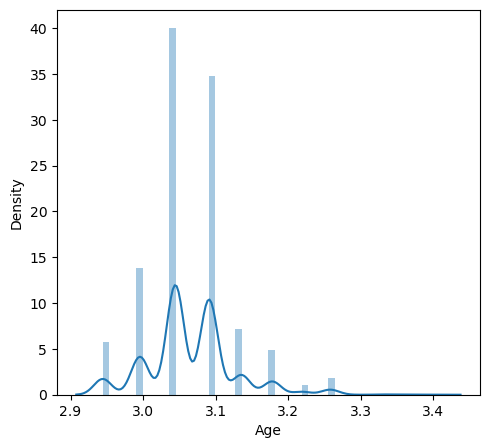

In [21]:
transformationplot(np.log(df['Age']))

In [22]:
df=df.replace(['Male'],[0])

In [23]:
df=df.replace(['Female'],[1])

In [24]:
df=df.replace(['Computer Science','Information Technology','Electronics And Communication','Mechanical','Electrical','Civil'],[0,1,2,3,4,5])

In [25]:
df=df.drop(['Hostel'],axis=1)

In [26]:
df

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,0,2,1,8,1,1
1,21,1,0,0,7,1,1
2,22,1,1,1,6,0,1
3,21,0,1,0,8,1,1
4,22,0,3,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,0,1,0,7,0,0
2962,23,0,3,1,7,0,0
2963,22,0,1,1,7,0,0
2964,22,0,0,1,7,0,0


In [27]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<AxesSubplot:>

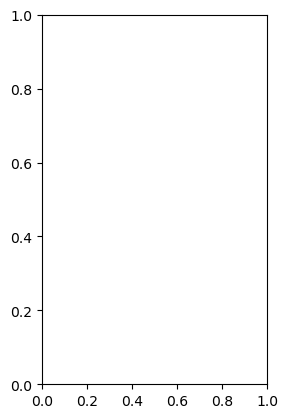

In [28]:
plt.subplot(121)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CGPA', ylabel='Density'>

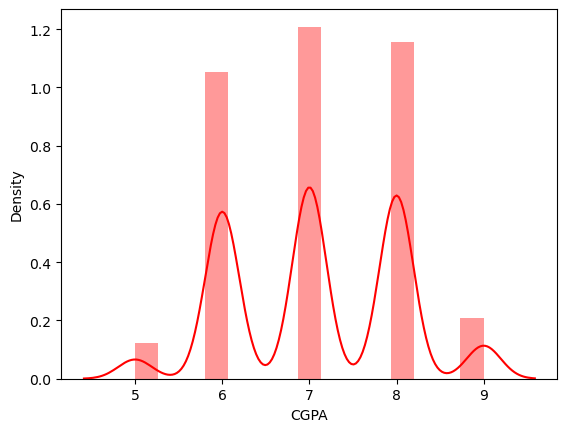

In [29]:
sns.distplot(df['CGPA'],color='r')

In [30]:
plt.figure(figsize=(12,5))
plt.show()

<Figure size 1200x500 with 0 Axes>

<AxesSubplot:>

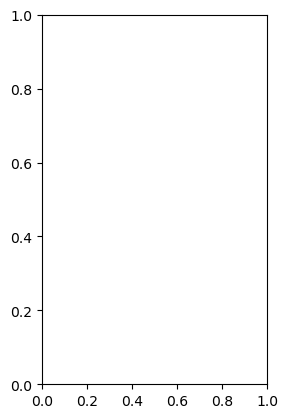

In [31]:
plt.subplot(121)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PlacedOrNot', ylabel='Density'>

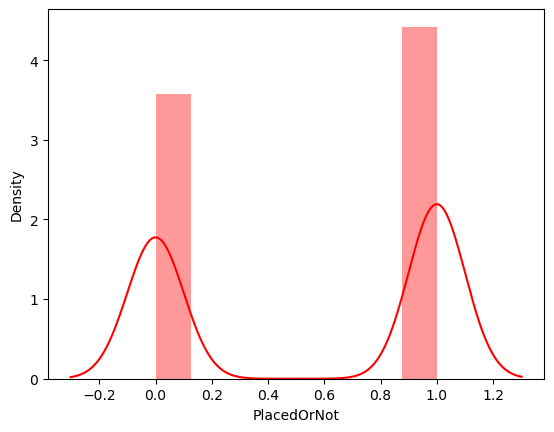

In [32]:
sns.distplot(df['PlacedOrNot'],color='r')

In [33]:
plt.figure(figsize=(18,4))

<Figure size 1800x400 with 0 Axes>

<Figure size 1800x400 with 0 Axes>

<AxesSubplot:>

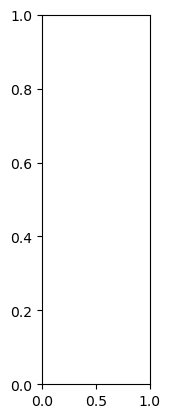

In [34]:
plt.subplot(1,4,1)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

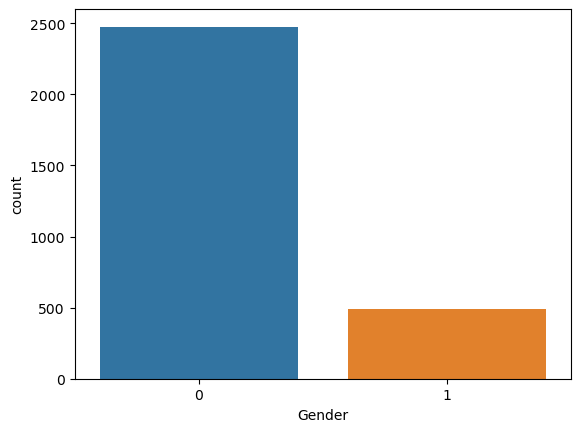

In [35]:
sns.countplot(df['Gender'])

<AxesSubplot:>

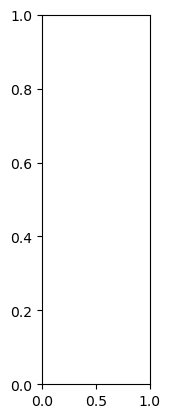

In [36]:
plt.subplot(1,4,2)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


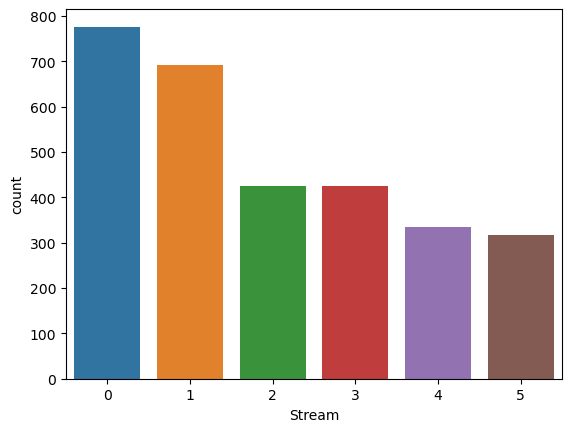

In [37]:
sns.countplot(df['Stream'])
plt.show()

In [38]:
plt.figure(figsize=(20,5))

<Figure size 2000x500 with 0 Axes>

<Figure size 2000x500 with 0 Axes>

<AxesSubplot:>

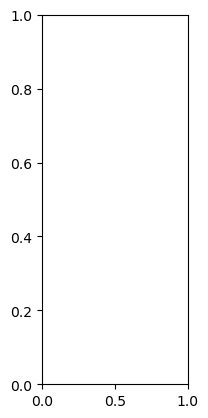

In [39]:
plt.subplot(131)

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PlacedOrNot', ylabel='count'>

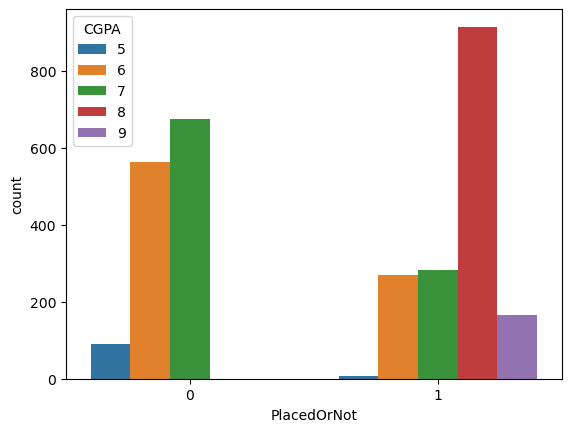

In [40]:
sns.countplot(df["PlacedOrNot"],hue=df['CGPA'])

C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ELCOT\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 93.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='PlacedOrNot', ylabel='CGPA'>

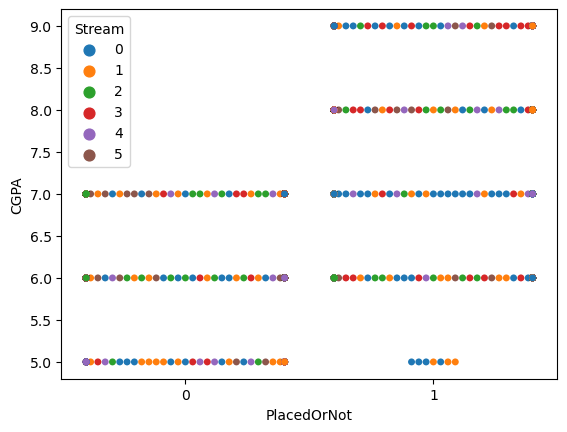

In [41]:
sns.swarmplot(df['PlacedOrNot'],df['CGPA'],hue=df['Stream'])

In [42]:
sc=StandardScaler()
x_bal=sc.fit_transform(x_bal)
x_bal = pd.DataFrame(x_bal,columns=names)


NameError: name 'x_bal' is not defined

In [44]:
X = df['Stream']
Y = df['PlacedOrNot']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [55]:
classifier = svm.SVC(Kernel='linear')
classifier.fit(X_trail, Y_train)
SVC(Kernel'linear')
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

SyntaxError: invalid syntax (124499760.py, line 3)

In [46]:
best_k = {"Regular":0}

In [47]:
best_score = {"Regular":0}

In [48]:
for k in range(3, 50, 2):
knn_temp = KNeighborsClassifier(n_neighbors=k)
knn_temp.fit(X_train, Y_train)
knn_temp_pred = knn_temp.predict(X_test)
score = metrics.accuracy_score(Y_test, knn_temp_pred) * 100
if score >= best_score["Regular"] and score < 100:
    best_score["Regular"] = score
    best_k["Regular"] = k   

IndentationError: expected an indented block (1733042138.py, line 2)

In [49]:
print("---Results---\nK: {}\nScore: {}".format(best_k, best_score))
knn = KNeighborsClassifier(n_neighbors=best_k["Regular"])
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
testd = accuracy_score(knn_pred, Y_test)

---Results---
K: {'Regular': 0}
Score: {'Regular': 0}


ValueError: Expected 2D array, got 1D array instead:
array=[5 1 1 ... 0 1 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [50]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers

In [51]:
classifier = Sequential()
classifier.add(keras.layers.Dense(6,activation = 'relu', input_dim = 6))
classifier.add(keras.layers.Dropout(0.50))
classifier.add(keras.layers.Dense(6,activation = 'relu'))
classifier.add(keras.layers.Dropout(0.50))
classifier.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [52]:
loss_1=tf. keras.losses.BinaryCrossentropy()
classifier.compile(optimizer='Adam', loss = loss_1, metrics = ['accuracy'] )

In [53]:
classifier.fit(X_train, Y_train, batch_size = 20, epochs = 100)

Epoch 1/100


ValueError: in user code:

    File "C:\Users\ELCOT\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ELCOT\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ELCOT\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ELCOT\anaconda3\lib\site-packages\keras\engine\training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\ELCOT\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ELCOT\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 6, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int64)
      • training=True
      • mask=None


In [ ]:
import pickle

In [ ]:
pickle.dump(knn,open("placement.pkl",'wb'))

In [ ]:
model = pickle.load(open('placement.pkl', 'rb'))

In [ ]:
<section id="hero" class="d-flex flex-column justify-content-center">
  <div class="container">
    <div class="row justify-content-center">
      <div class="col-xl-8">
        <h1>Identifying Patterns and Trends in Campus Placement Data Using Machine Learning</h1>
    </div>
    </div>
    </div>
</section>

In [ ]:
<section id="about" class="about">
  <div class="container"> 
    
    <div class="section-title">
      <h2>Fill the details</h2>
        
    </div>
    <div class="row content">
      <div class="first">
        <from action="{{ url_for('y_predict')}}" method="POST">
            <input type="number" id="sen1" name="sen1" placeholder="Age">
            <input type="number" id="sen2" name="sen2" placeholder="Gender m(0),F(0)">
            <input type="number" id="sen3" name="sen3" placeholder="Stream CS(0),IT(1),ECE(2),Mech(3),EEE(4),Civil">
            <input type="number" id="sen4" name="sen4" placeholder="Internships">
            <input type="number" id="sen5" name="sen5" placeholder="CGPA">
            <input type="number" id="sen6" name="sen6" placeholder="Number  of backlogs">
            <input type="submit" value="Submit">
            
        </form>
    </div>
    </div>
    
    </div>
</section>


In [ ]:
<section id="hero" class="d-flex flex-column justify-content-center">
  <div class="container">
    <div class="row justify-content-center">
      <div class="col-xl-8">
        <h1>The Prediction is : {{y}}</h1>
        <h3> 0 represents Not-Placed </h3>
        <h3> 1 represents Placed<h2>
    </div>
</div>
</div>
</section>

In [ ]:
from flask import Flask, render_template, request
app=Flask(__name__)
import pickle
import joblib
model=pickle.load(open("placement123.pkl",'rb'))
ct=joblib.load('placement')

In [ ]:
@app.route('/')
def hello():
    return render_template("index.html")

In [ ]:
@app.route('/guest',methods=["POST"])
def Guest():
    sen1=request.form["sen1"]
    sen2=request.form["sen2"]
    sen3=request.form["sen3"]
    sen4=request.form["sen4"]
    sen5=request.form["sen5"]
    sen6=request.form["sen6"]

In [ ]:
@app.route('/y_predict',methods=["POST"])
def y_predict():
    x_test=[[(yo)for yo in request.form.values()]]
    prediction=model.predict(x_test)
    prediction=prediction[0]
    return render_template("secondpage.html",y=prediction)

In [ ]:
app.run(debug=True)